Part 1:
Data Collection and Loading

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
# Load dataset
df = pd.read_csv("flight_delay_dataset.csv")
df

,flight_id,carrier_name,airport_origin,airport_dest,flight_date,day_of_week,month,hour,scheduled_departure,scheduled_arrival,distance_km,flight_duration_min,weather_condition,temperature_c,visibility_km,precipitation_mm,traffic_level,airport_congestion_index,arr_delay,delay_class
0,FL100000,Lufthansa,LHR - London Heathrow,ORD - Chicago,2023-01-01,4,1,6,00:00,01:00,475,349,Snow,20.2,6.3,1.2,Medium,0.56,81,Delayed
1,FL100001,Southwest Airlines,ATL - Atlanta,DXB - Dubai,2023-01-01,6,9,6,01:00,02:00,13125,899,Clear,12.0,10.4,3.5,High,0.07,33,Delayed
2,FL100002,Turkish Airlines,ORD - Chicago,JFK - New York,2023-01-01,4,12,5,02:00,03:00,14909,746,Thunderstorm,27.6,8.5,0.4,High,0.13,101,Delayed
3,FL100003,Japan Airlines,DEL - New Delhi,JFK - New York,2023-01-01,2,10,16,03:00,04:00,2856,874,Thunderstorm,21.2,10.4,0.7,Medium,0.88,144,Delayed
4,FL100004,Air France,DXB - Dubai,CDG - Paris,2023-01-01,1,10,12,04:00,05:00,4577,409,Windy,13.4,10.2,0.1,NaN,0.11,26,Delayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,FL199995,British Airways,SYD - Sydney,SIN - Singapore,2034-05-29,4,3,16,11:00,12:00,2968,627,Clear,NaN,8.1,1.3,Medium,0.12,47,Delayed
99996,FL199996,Emirates,DXB - Dubai,HND - Tokyo Haneda,2034-05-29,7,9,1,12:00,13:00,4099,588,Snow,14.6,0.9,NaN,Low,0.23,67,Delayed
99997,FL199997,Lufthansa,DXB - Dubai,CDG - Paris,2034-05-29,3,10,19,13:00,14:00,7111,835,Snow,9.8,6.5,5.8,Medium,0.05,63,Delayed
99998,FL199998,Air France,SYD - Sydney,FRA - Frankfurt,2034-05-29,6,9,15,14:00,15:00,5960,86,Fog,30.3,6.6,2.2,Medium,0.96,98,Delayed


Part 2:
Basic EDA

In [40]:
# 1. Inspect Dataset
print("Shape:", df.shape)
print("\nColumn Types:\n", df.dtypes)

Shape: (100000, 20)

Column Types:
 flight_id                    object
carrier_name                 object
airport_origin               object
airport_dest                 object
flight_date                  object
day_of_week                   int64
month                         int64
hour                          int64
scheduled_departure          object
scheduled_arrival            object
distance_km                   int64
flight_duration_min           int64
weather_condition            object
temperature_c               float64
visibility_km               float64
precipitation_mm            float64
traffic_level                object
airport_congestion_index    float64
arr_delay                     int64
delay_class                  object
dtype: object


In [41]:
# 2. Basic Statistics
print("\nBasic Statistics:\n", df.describe(include="all").transpose())


Basic Statistics:
                              count  unique              top   freq  \
flight_id                   100000  100000         FL100000      1   
carrier_name                100000      15         Emirates   6790   
airport_origin              100000      15  SIN - Singapore   6808   
airport_dest                100000      15    ATL - Atlanta   6798   
flight_date                 100000    4167       2023-01-01     24   
day_of_week               100000.0     NaN              NaN    NaN   
month                     100000.0     NaN              NaN    NaN   
hour                      100000.0     NaN              NaN    NaN   
scheduled_departure         100000      24            00:00   4167   
scheduled_arrival           100000      24            01:00   4167   
distance_km               100000.0     NaN              NaN    NaN   
flight_duration_min       100000.0     NaN              NaN    NaN   
weather_condition            95000       6     Thunderstorm  15980   


In [42]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 flight_id                      0
carrier_name                   0
airport_origin                 0
airport_dest                   0
flight_date                    0
day_of_week                    0
month                          0
hour                           0
scheduled_departure            0
scheduled_arrival              0
distance_km                    0
flight_duration_min            0
weather_condition           5000
temperature_c               5000
visibility_km               5000
precipitation_mm            5000
traffic_level               5000
airport_congestion_index       0
arr_delay                      0
delay_class                    0
dtype: int64


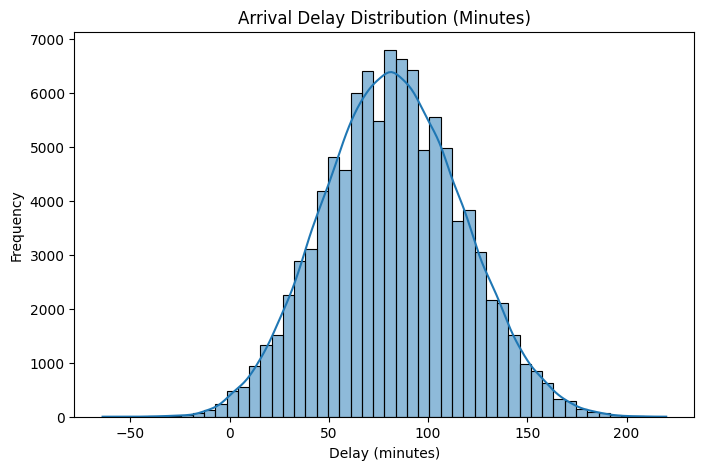


Delay Class Counts:
 delay_class
Delayed    97554
On-time     2446
Name: count, dtype: int64


In [43]:
# 3. Target Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["arr_delay"], bins=50, kde=True)
plt.title("Arrival Delay Distribution (Minutes)")
plt.xlabel("Delay (minutes)")
plt.ylabel("Frequency")
plt.show()

print("\nDelay Class Counts:\n", df["delay_class"].value_counts())

In [44]:
# 4. Categorical Analysis
avg_delay_carrier = df.groupby("carrier_name")["arr_delay"].mean().sort_values(ascending=False)
print("\nAverage Delay by Carrier:\n", avg_delay_carrier)

avg_delay_origin = df.groupby("airport_origin")["arr_delay"].mean().sort_values(ascending=False)
print("\nAverage Delay by Origin Airport:\n", avg_delay_origin)

avg_delay_dest = df.groupby("airport_dest")["arr_delay"].mean().sort_values(ascending=False)
print("\nAverage Delay by Destination Airport:\n", avg_delay_dest)


Average Delay by Carrier:
 carrier_name
Air France            83.589668
American Airlines     82.625454
British Airways       82.608818
Lufthansa             82.581031
Turkish Airlines      82.483614
Southwest Airlines    82.479691
Singapore Airlines    82.452106
Delta Air Lines       82.451506
Emirates              82.310162
United Airlines       82.298343
KLM                   82.168208
ANA                   82.154831
Qatar Airways         82.018196
Air India             82.009882
Japan Airlines        81.777593
Name: arr_delay, dtype: float64

Average Delay by Origin Airport:
 airport_origin
LAX - Los Angeles        82.861996
DEL - New Delhi          82.748508
ATL - Atlanta            82.722111
ORD - Chicago            82.602149
CDG - Paris              82.575726
DXB - Dubai              82.495834
SYD - Sydney             82.469073
BOM - Mumbai             82.463807
SIN - Singapore          82.459166
DFW - Dallas             82.316465
LHR - London Heathrow    82.249411
HND - Tokyo 

In [45]:
# 5. Time-Based Patterns
avg_delay_day = df.groupby("day_of_week")["arr_delay"].mean()
print("\nAverage Delay by Day of Week:\n", avg_delay_day)

avg_delay_month = df.groupby("month")["arr_delay"].mean()
print("\nAverage Delay by Month:\n", avg_delay_month)

avg_delay_hour = df.groupby("hour")["arr_delay"].mean()
print("\nAverage Delay by Hour:\n", avg_delay_hour)


Average Delay by Day of Week:
 day_of_week
1    82.391071
2    82.076325
3    82.389209
4    82.186557
5    82.648817
6    82.611281
7    82.494658
Name: arr_delay, dtype: float64

Average Delay by Month:
 month
1     82.751107
2     82.250420
3     82.601912
4     82.349264
5     82.404392
6     82.616150
7     82.203410
8     81.876269
9     82.932664
10    81.855766
11    82.435338
12    82.523396
Name: arr_delay, dtype: float64

Average Delay by Hour:
 hour
0     73.617460
1     74.268095
2     73.947672
3     73.274247
4     73.537242
5     73.499514
6     93.024821
7     93.264507
8     94.180464
9     94.373023
10    78.631154
11    78.191323
12    78.859753
13    78.874214
14    78.286115
15    77.508139
16    93.841220
17    93.281343
18    93.424584
19    93.926432
20    94.350395
21    74.469729
22    73.631604
23    73.760885
Name: arr_delay, dtype: float64


In [46]:
# 6. Weather & Traffic Effects
avg_delay_weather = df.groupby("weather_condition")["arr_delay"].mean()
print("\nAverage Delay by Weather:\n", avg_delay_weather)

avg_delay_traffic = df.groupby("traffic_level")["arr_delay"].mean()
print("\nAverage Delay by Traffic Level:\n", avg_delay_traffic)

corr_congestion = df[["airport_congestion_index","arr_delay"]].corr().iloc[0,1]
print("\nCorrelation between Congestion Index and Arrival Delay:", corr_congestion)


Average Delay by Weather:
 weather_condition
Clear            55.040858
Fog              85.005537
Rain             74.710967
Snow             99.761413
Thunderstorm    114.738173
Windy            64.830568
Name: arr_delay, dtype: float64

Average Delay by Traffic Level:
 traffic_level
High      95.747891
Low       70.623683
Medium    80.795933
Name: arr_delay, dtype: float64

Correlation between Congestion Index and Arrival Delay: 0.4150463231477468


Part 3: 
Data Exploration & Visualization Code

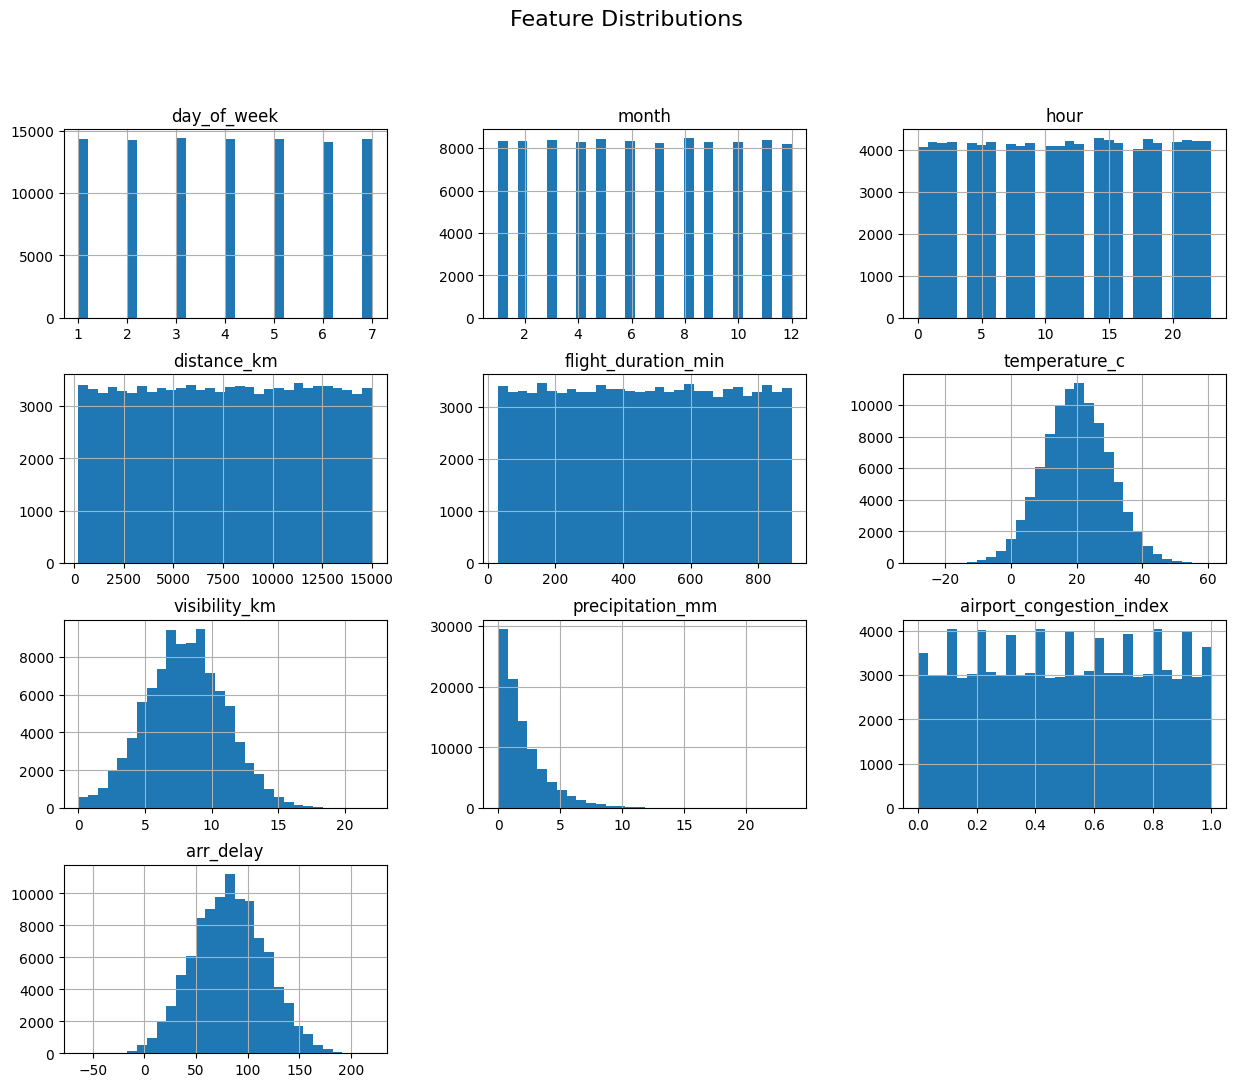

In [47]:
#1.Numeric feature distributions
df.hist(figsize=(15,12), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

C:\Users\Tejas Pund\AppData\Local\Temp\ipykernel_32524\387893078.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="carrier_name", y="arr_delay", data=df, ci=None)


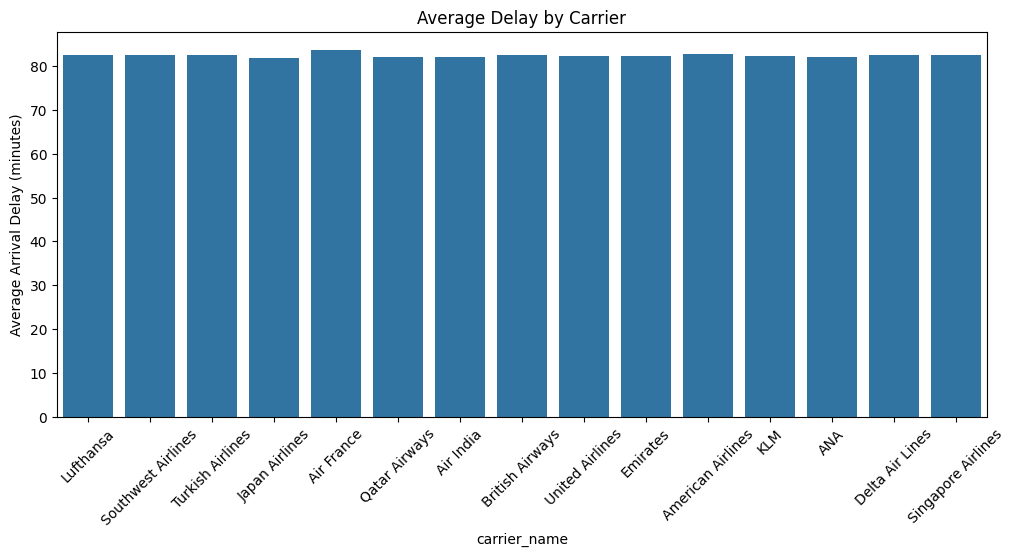

In [48]:
# 2. Impact of Different Features on Delays
# a) Carrier impact
plt.figure(figsize=(12,5))
sns.barplot(x="carrier_name", y="arr_delay", data=df, ci=None)
plt.xticks(rotation=45)
plt.title("Average Delay by Carrier")
plt.ylabel("Average Arrival Delay (minutes)")
plt.show()

C:\Users\Tejas Pund\AppData\Local\Temp\ipykernel_32524\160251161.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="airport_origin", y="arr_delay", data=df, ci=None)


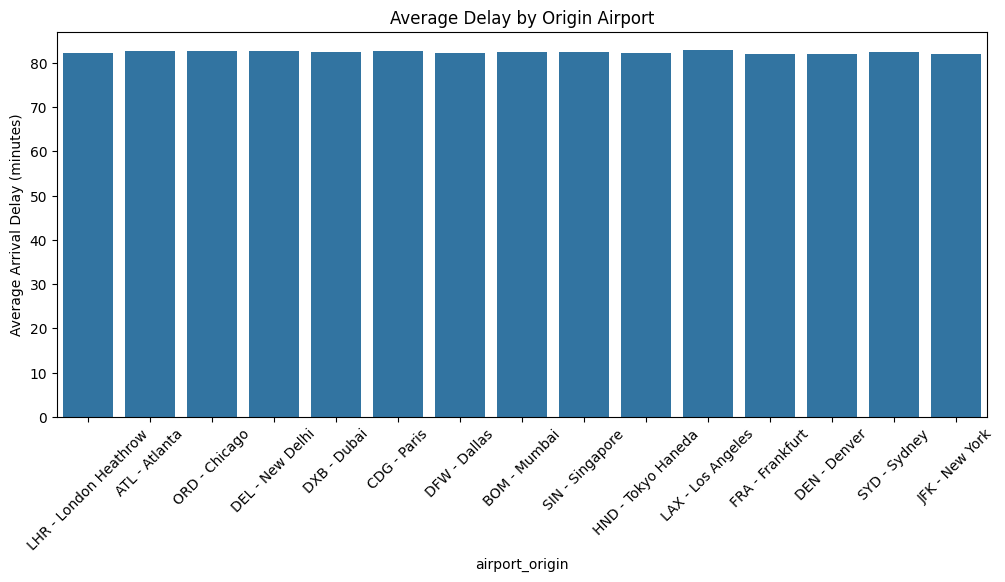

In [49]:
# b) Airport (Origin) impact
plt.figure(figsize=(12,5))
sns.barplot(x="airport_origin", y="arr_delay", data=df, ci=None)
plt.xticks(rotation=45)
plt.title("Average Delay by Origin Airport")
plt.ylabel("Average Arrival Delay (minutes)")
plt.show()

C:\Users\Tejas Pund\AppData\Local\Temp\ipykernel_32524\4010211472.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="weather_condition", y="arr_delay", data=df, ci=None)


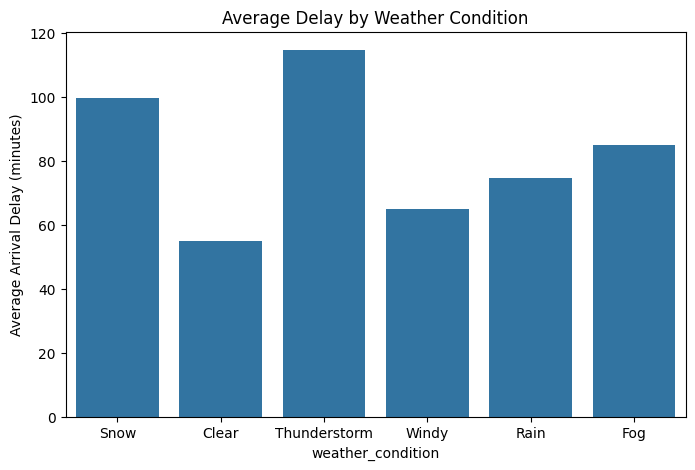

In [50]:
# c) Weather impact
plt.figure(figsize=(8,5))
sns.barplot(x="weather_condition", y="arr_delay", data=df, ci=None)
plt.title("Average Delay by Weather Condition")
plt.ylabel("Average Arrival Delay (minutes)")
plt.show()

C:\Users\Tejas Pund\AppData\Local\Temp\ipykernel_32524\123232718.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="traffic_level", y="arr_delay", data=df, ci=None)


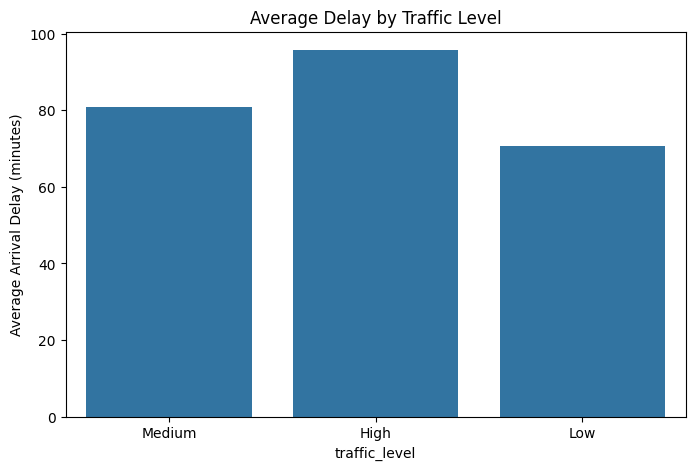

In [51]:
# d) Traffic impact
plt.figure(figsize=(8,5))
sns.barplot(x="traffic_level", y="arr_delay", data=df, ci=None)
plt.title("Average Delay by Traffic Level")
plt.ylabel("Average Arrival Delay (minutes)")
plt.show()

C:\Users\Tejas Pund\AppData\Local\Temp\ipykernel_32524\557995452.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="hour", y="arr_delay", data=df, ci=None, marker="o")


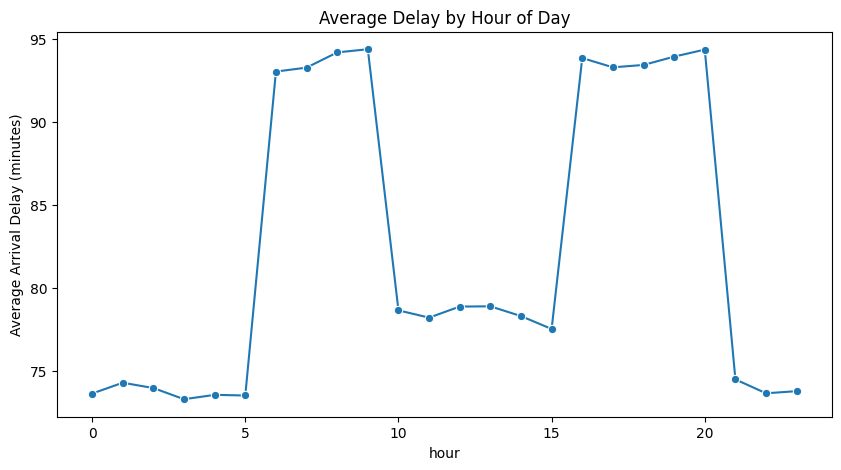

In [52]:
# e) Hour of the day impact
plt.figure(figsize=(10,5))
sns.lineplot(x="hour", y="arr_delay", data=df, ci=None, marker="o")
plt.title("Average Delay by Hour of Day")
plt.ylabel("Average Arrival Delay (minutes)")
plt.show()

Part 4: Data Preprocessing

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [54]:
# 1. Handle Missing Values
# Fill numeric missing values with mean
num_cols = df.select_dtypes(include=["float64","int64"]).columns
for i in num_cols:
    df[i].fillna(df[i].mean(), inplace=True)


# Fill categorical missing values with mode
cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\Tejas Pund\AppData\Local\Temp\ipykernel_32524\945818084.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mean(), inplace=True)
C:\Users\Tejas Pund\AppData\Local\Temp\ipykernel_32524\945818084.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [55]:
# 2. Handle Outliers (on arr_delay)
# Removed extreme outliers (flights delayed more than 1 day = 1440 minutes)
df = df[df["arr_delay"].between(-300, 1440)]  # also allow early arrivals (negative delays)

In [56]:
# 3. Encode Categorical Variables
# One-Hot Encode categorical features
X = df.drop(["arr_delay", "delay_class", "flight_id", "flight_date"], axis=1)  # drop target + IDs + date
y = df["arr_delay"]   # regression target
X = pd.get_dummies(X, drop_first=True) #Encode categorical features

In [57]:
print("Categorical variables encoded, shape:", X.shape)
print("Target Column shape:", y.shape)

Categorical variables encoded, shape: (100000, 104)
Target Column shape: (100000,)


In [58]:
# 4. Normalize Numerical Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [59]:
# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (80000, 104) Test shape: (20000, 104)


Part 5: Random Forest Model Training (Regression)

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [61]:
# 1. Initialize Random Forest
rf_model = RandomForestRegressor(
    n_estimators=100,   # number of trees
    random_state=42,
    n_jobs=-1          # use all CPU cores for speed
)

In [62]:
# 2. Train the model
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [63]:
# 3. Predictions
y_pred = rf_model.predict(X_test)

In [64]:
# 4. Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [65]:
print("Random Forest Results:")
print("RMSE:", rmse)
print("R² Score:", r2)

Random Forest Results:
RMSE: 22.66181723295817
R² Score: 0.5760096310742926


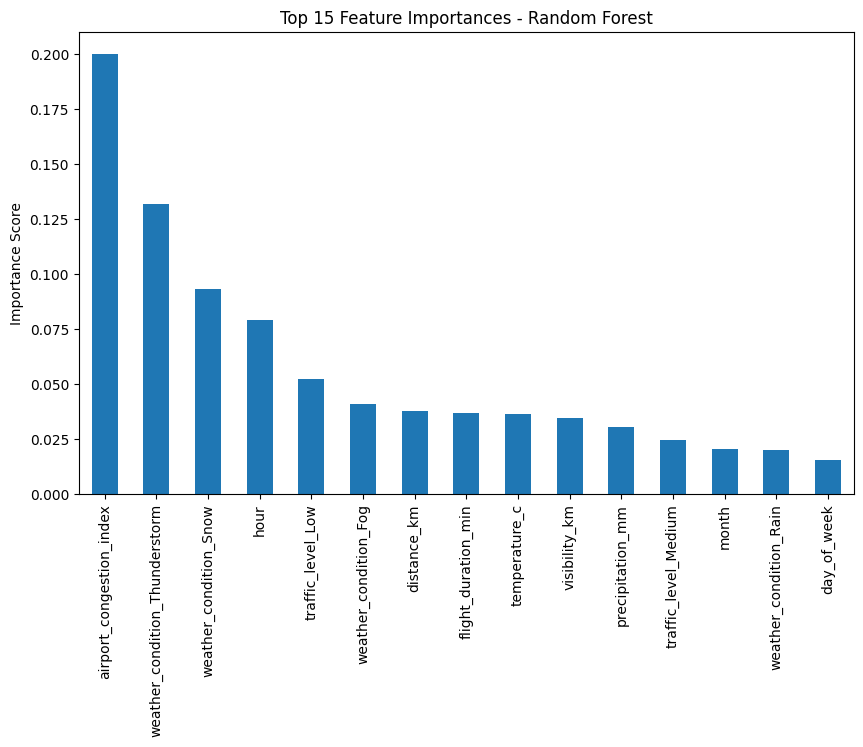

In [67]:
# Check Feature Importance (to confirm model is learning from weather, traffic, congestion).
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
top_features.plot(kind="bar")
plt.title("Top 15 Feature Importances - Random Forest")
plt.ylabel("Importance Score")
plt.show()

Part 5:
Random Forest with 3-Fold Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np
# Why ? we use CVS
# If we later adjust Random Forest parameters (n_estimators, max_depth, etc.), CV ensures you don’t overfit to a single split.
# Instead of depending on a single train/test split, CV checks performance across multiple splits.

In [69]:
# Re-initialize model (important for CV, avoids using pre-fitted model)
rf_model = RandomForestRegressor(
    n_estimators=100, 
    random_state=42, 
    n_jobs=-1
)

In [70]:
# Perform 3-fold CV
cv_scores = cross_val_score(
    rf_model, X_scaled, y, cv=3, scoring="r2", n_jobs=-1
)

In [71]:
print("Cross-Validation R² Scores:", cv_scores)
print("Mean CV R²:", np.mean(cv_scores))
print("Std Dev of CV R²:", np.std(cv_scores))

Cross-Validation R² Scores: [0.57197745 0.57651576 0.58070641]
Mean CV R²: 0.5763998762450481
Std Dev of CV R²: 0.003564526055509551


Interpretation: 

Part 6:
Hyperparameter Tuning (RandomizedSearchCV for Random Forest)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np
# Why we use?
# Random Forest model has settings called hyperparameters (like number of trees, tree depth, etc.).
# Right now, you used default values (only changed n_estimators=100).
# Hyperparameter Tuning = trying different combinations of these settings to find the best one for your dataset.
# RandomizedSearchCV → picks random combinations (much faster, good for big datasets like yours).
# So instead of you manually guessing the best settings, the computer tests multiple options and gives you the best model parameters.

In [73]:
# Re-Define the model
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

In [74]:
# Define hyperparameter search space
param_dist = {
    "n_estimators": [100, 200, 300, 500],        # number of trees
    "max_depth": [None, 10, 20, 30, 50],         # depth of trees
    "min_samples_split": [2, 5, 10],             # min samples to split a node
    "min_samples_leaf": [1, 2, 4],               # min samples in a leaf
    "max_features": ["auto", "sqrt", "log2"]     # features considered at each split
}

In [75]:
# Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,              # number of random combinations to try (can increase)
    cv=3,                   # 3-fold cross validation
    scoring="r2",
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [76]:
# Fit the search
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\Tejas Pund\OneDrive\Desktop\Python\venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
6 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Tejas Pund\OneDrive\Desktop\Python\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Tejas Pund\OneDrive\Desktop\Python\venv\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Users\Tejas Pund\OneDr

,estimator,RandomForestR...ndom_state=42)
,param_distributions,"{'max_depth': [None, 10, ...], 'max_features': ['auto', 'sqrt', ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,n_iter,10
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [77]:
# Best parameters
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50}


In [78]:
# Evaluate best model
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

In [79]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [80]:
print("\n Tuned Random Forest Results:")
print("RMSE:", rmse)
print("R² Score:", r2)


 Tuned Random Forest Results:
RMSE: 23.392184594256157
R² Score: 0.5482396708748912
